# Vineela Kodamagundla

#  #GRIPJUNE22

## Prediction using Supervised ML

- Predict the percentage of a student based on number of study hours.
- This is a simple Linear Regression task as it involves just two variables.
- You can use R,Python,SAS Enterprise Miner or any other tool.
- Data can be found at http://bit.ly/w-data
- What will be predicted score if a student studies for 9.25hrs/day?

In [1]:
#Importing the required libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Reading the data from given link.
df = pd.read_csv("https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv")

In [3]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


<AxesSubplot:xlabel='Hours', ylabel='Scores'>

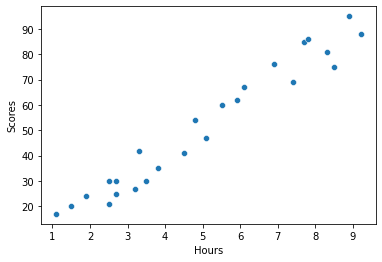

In [26]:
#Plotting the distribution of scores over hours.
sns.scatterplot(x='Hours',data=df,y='Scores')

<AxesSubplot:xlabel='Hours', ylabel='Scores'>

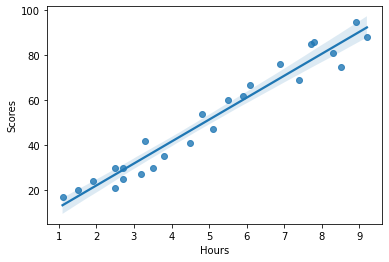

In [27]:
#Plotting the regression line for the given data.
sns.regplot(data=df,x='Hours',y='Scores')

## Preparing the data

In [ ]:
#dividing the data into "attributes" (inputs) and "labels" (outputs).

In [6]:
X = df['Hours'].values.reshape(-1,1)
#We need to reshape 'X' as we have only single feature.

In [7]:
y = df['Scores']

In [8]:
# splitting the data into training and test sets.
from sklearn.model_selection import train_test_split

In [9]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.1,random_state=42)

## Training the model

In [10]:
from sklearn.linear_model import LinearRegression

In [11]:
model = LinearRegression()

In [12]:
model.fit(X_train,y_train)

LinearRegression()

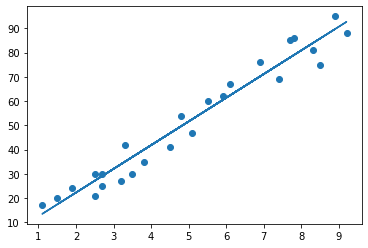

In [13]:
#Plotting the regression line.
line = model.coef_*X + model.intercept_
plt.scatter(X,y)
plt.plot(X, line);

## Making Predictions

In [14]:
#predicting the y labels.
preds = model.predict(X_test)

In [15]:
preds

array([83.89727817, 27.15092273, 27.15092273])

In [16]:
y_test

8     81
16    30
0     21
Name: Scores, dtype: int64

In [29]:
# Comparing Actual vs Predicted
pd.DataFrame({'Actual': y_test, 'Predicted': preds})  

,Actual,Predicted
8,81,83.897278
16,30,27.150923
0,21,27.150923


In [17]:
#Calculating the residuals.
residuals = y_test - preds
residuals

8    -2.897278
16    2.849077
0    -6.150923
Name: Scores, dtype: float64

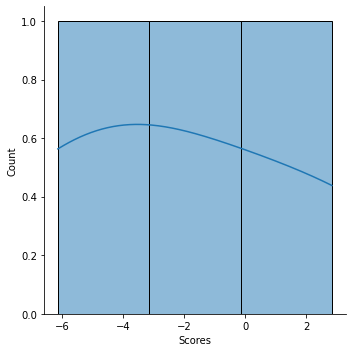

In [18]:
sns.displot(residuals,kde=True)

## Evaluating the model

In [19]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,accuracy_score

In [20]:
mean_absolute_error(y_test,preds)

3.9657593887812133

In [21]:
np.sqrt(mean_squared_error(y_test,preds))

4.256184225081326

## Predicting the given test case

In [30]:
# What will be predicted score if a student studies for 9.25hrs/day?

In [31]:
#fitting the model on entire data
model.fit(X,y)

LinearRegression()

In [32]:
data = 9.25
test_case = pd.Series(data)

In [33]:
test_case = test_case.values.reshape(-1,1)

In [34]:
model.predict(test_case)

array([92.90985477])

In [35]:
# Predicted score of the student who studies for 9.25hrs/day is 92.9